<a href="https://colab.research.google.com/github/somewherelostt/Sentiment-Imbalance-Research/blob/main/Sentiment_Analysis_Without_Balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

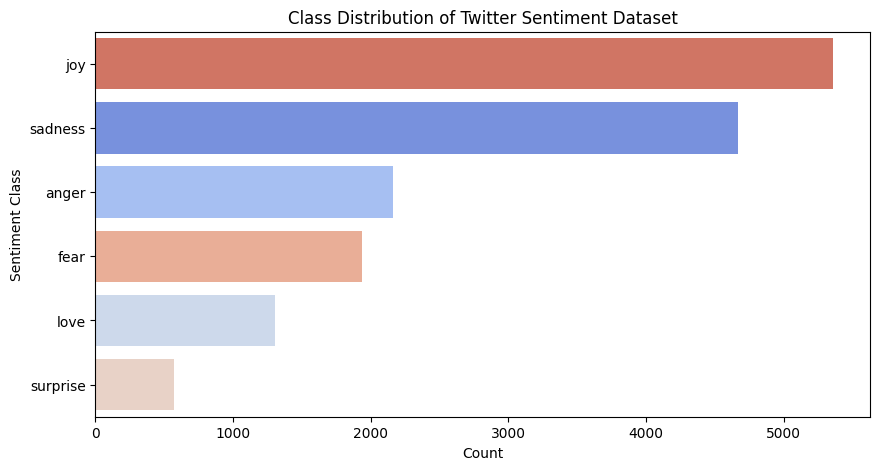

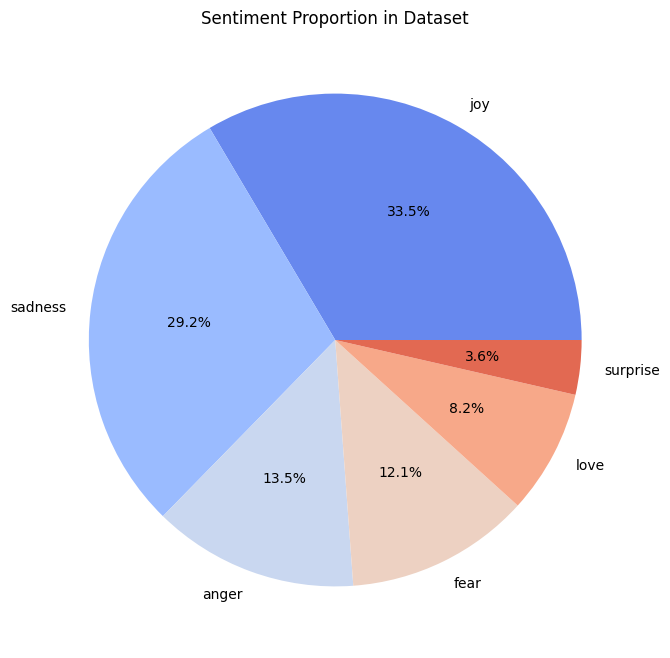

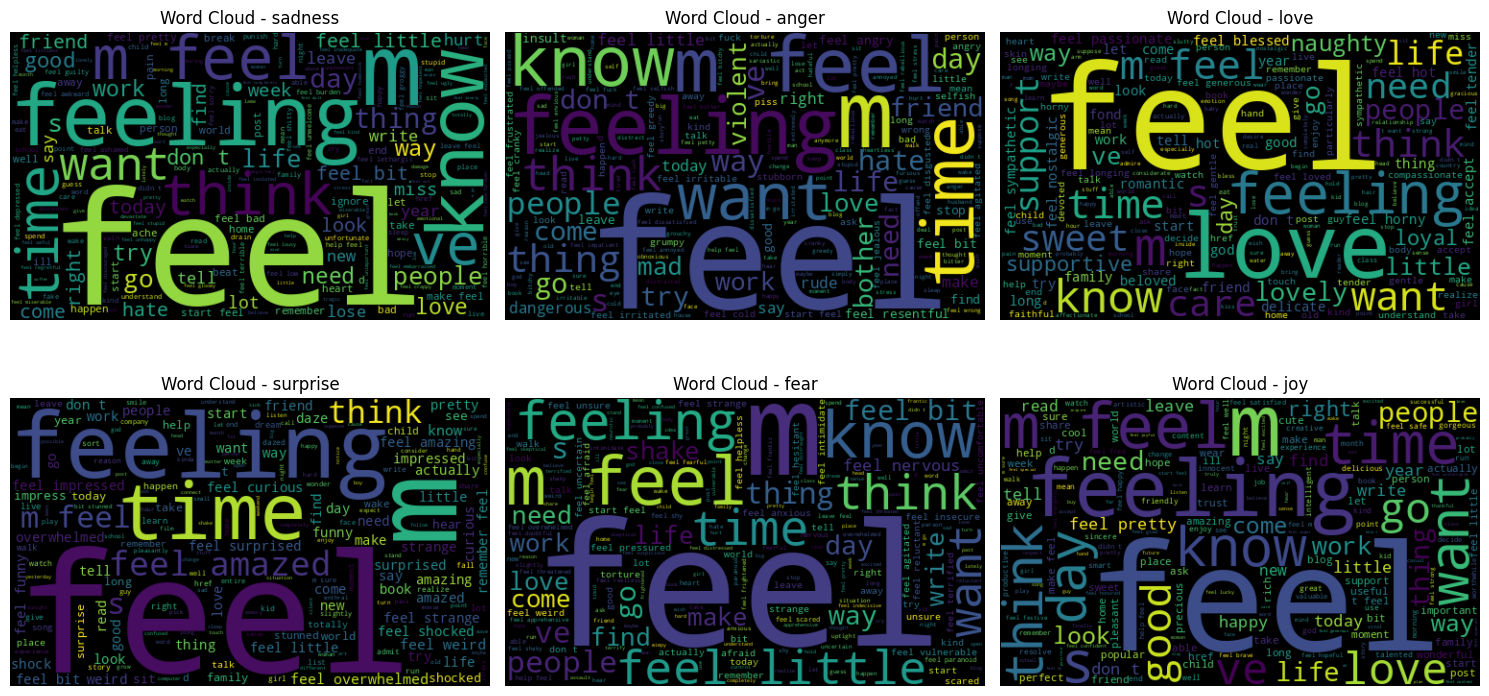

<ipython-input-8-c523277e46b4>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["sentiment"], y=df["text_length"], palette="coolwarm")


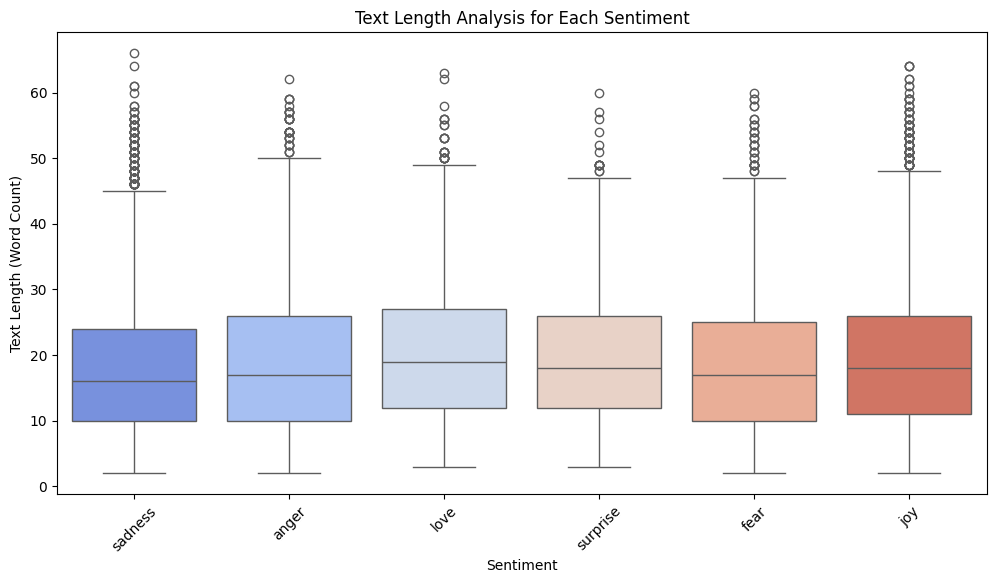

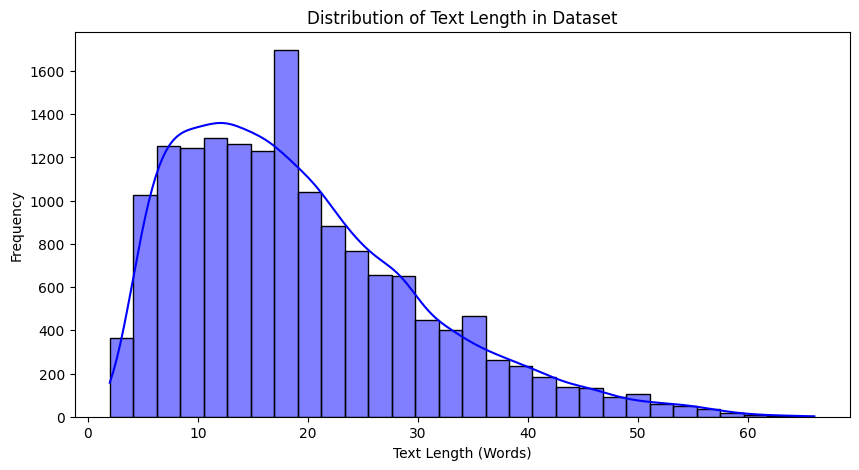

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_multi_class_sentiment.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Rename columns properly
df.rename(columns={'label_name': 'sentiment'}, inplace=True)

# 1️⃣ Bar Chart: Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df['sentiment'], order=df['sentiment'].value_counts().index, hue=df['sentiment'], legend=False, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Sentiment Class")
plt.title("Class Distribution of Twitter Sentiment Dataset")
plt.show()

# 2️⃣ Pie Chart: Sentiment Proportions
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(df['sentiment'].unique())))
plt.ylabel("")
plt.title("Sentiment Proportion in Dataset")
plt.show()

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess_text(text):
    doc = nlp(str(text).lower())  # Convert to lowercase and handle missing values
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df["cleaned_text"] = df["text"].apply(preprocess_text)

# 3️⃣ Word Cloud for Most Frequent Words in Each Sentiment
plt.figure(figsize=(15, 8))
for i, sentiment in enumerate(df['sentiment'].unique()):
    text_data = " ".join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=500, height=300, background_color="black").generate(text_data)
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment}")

plt.tight_layout()
plt.show()

# 4️⃣ Box Plot: Text Length Analysis by Sentiment
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["sentiment"], y=df["text_length"], palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Text Length (Word Count)")
plt.title("Text Length Analysis for Each Sentiment")
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Histogram of Text Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["text_length"], bins=30, kde=True, color="blue")
plt.xlabel("Text Length (Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length in Dataset")
plt.show()


🔹 Accuracy: 0.8466

🔹 Classification Report:

              precision    recall  f1-score   support

       anger       0.91      0.78      0.84       432
        fear       0.87      0.77      0.81       387
         joy       0.81      0.95      0.87      1072
        love       0.82      0.57      0.67       261
     sadness       0.87      0.91      0.89       933
    surprise       0.86      0.51      0.64       115

    accuracy                           0.85      3200
   macro avg       0.85      0.75      0.79      3200
weighted avg       0.85      0.85      0.84      3200



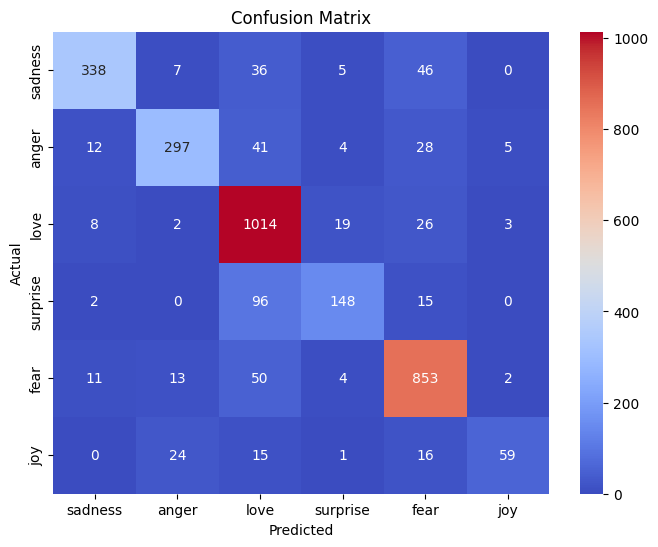

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1️⃣ Prepare Data for Model Training
X = df["cleaned_text"]  # Features (processed text)
y = df["sentiment"]  # Target labels

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 2️⃣ Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 3️⃣ Make Predictions
y_pred = model.predict(X_test_tfidf)

# 4️⃣ Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Accuracy: {accuracy:.4f}\n")

# Classification Report (Precision, Recall, F1-score)
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5️⃣ Confusion Matrix for Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=df["sentiment"].unique(), yticklabels=df["sentiment"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
